In [1]:
from src.data_preprocessing import *

df = load_data('../data/jobfair_train.csv')

columns_to_normalize = [
    'days_active_last_28_days', 'session_count_last_28_days',
    'avg_stars_top_11_players']

columns_to_drop = [
    'morale_boosters_stash', 'rests_stash', 'tokens_stash', 'tokens_spent_last_28_days',
    'avg_training_factor_top_11_players', 'avg_age_top_11_players',
    'league_match_watched_count_last_28_days', 'global_competition_level',
    'avg_stars_top_14_players', 'days_active_last_28_days', 'session_count_last_28_days',
    'playtime_last_28_days', 'league_match_won_count_last_28_days', 'training_count_last_28_days',
    'avg_stars_top_11_players', 'global_competition_level', 'club_id','cohort_season','season','dynamic_payment_segment', 'registration_country', 'registration_platform_specific'
]

df = preprocess_data(df, columns_to_normalize, columns_to_drop)

In [2]:
from src.models import *
X_train, X_test, y_train, y_test = league_test_split(df, test_size=0.2, random_state=42)
model_rf = getRandomForestModel(X_train, y_train)
predictions_rf = np.round(model_rf.predict(X_test))

In [3]:
model_lr = getLinearRegressionModel(X_train, y_train)
x_test_with_const = sm.add_constant(X_test)
predictions_lr = model_lr.predict(x_test_with_const)
predictions_lr = np.minimum(np.maximum(predictions_lr, 1), 14)

In [4]:
model_mlpr = getMLPRegressorModel(X_train, y_train)
predictions_mlp = np.round(model_mlpr.predict(scale(X_test)))

Model: MLPRegressor
Mean Absolute Error (MAE): 2.003973270724219
Adjusted R-squared: 0.5824342534835582


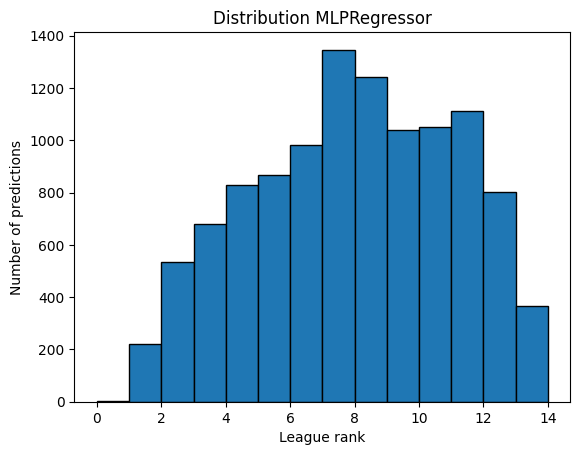

Model: Random Forest 
Mean Absolute Error (MAE): 2.010204081632653
Adjusted R-squared: 0.5791833956182881


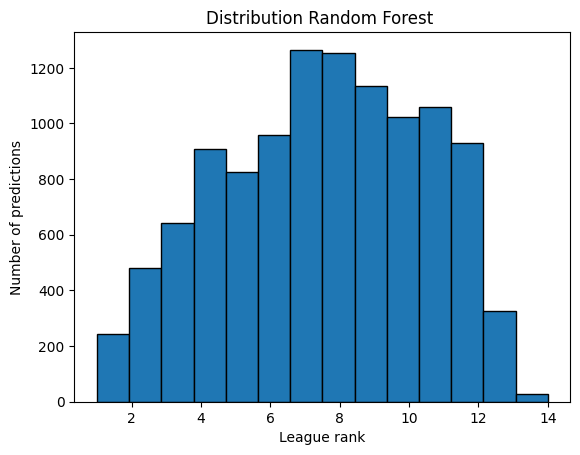

Model: Linear Regression
Mean Absolute Error (MAE): 2.1028734701116956
Adjusted R-squared: 0.5653188813573506


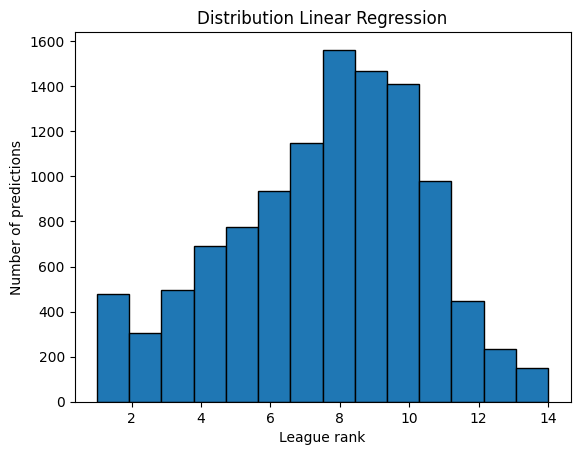

In [5]:
from src.model_evaluation import *

model_predictions = [('MLPRegressor', predictions_mlp), ('Random Forest ', predictions_rf), ('Linear Regression', predictions_lr)]
for model_name, predictions in model_predictions:
    evaluate_model_performance(model_name, y_test, predictions, X_test.shape[1], print_accuracy=False)
    plot_predictions_distribution(model_name, y_test, predictions)